In [1]:
import pandas as pd


In [2]:
traindata_all = pd.read_csv('./multimodal_train.tsv', sep='\t')
traindata_all.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12.0,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1.0,0.0,0.0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119.0,pareidolia,This concerned sink with a tiny hat,0.99,0.0,2.0,2.0
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44.0,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1.0,0.0,0.0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250.0,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1.0,0.0,0.0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13.0,pareidolia,I found a face in my sheet music too!,0.84,0.0,2.0,2.0


In [3]:
traindata_all['Text label'] = traindata_all['6_way_label'].map({
                                            0:'True',
                                            1:'Satire/Parody',
                                            2:'Misleading Content',
                                            3:'Imposter Content',
                                            4:'False Connection',
                                            5:'Manipulated Content',
                                        })                                          

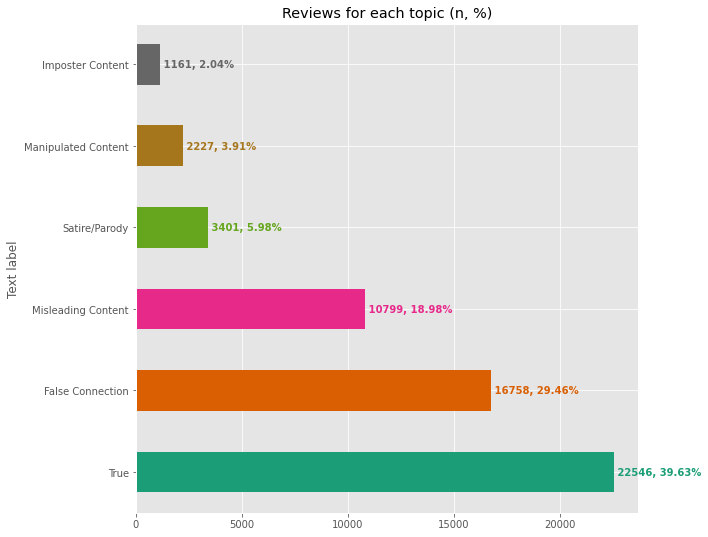

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


num_classes = len(traindata_all["Text label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

traindata_all['Text label'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Text label",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(traindata_all['Text label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/traindata_all.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')


We need to balance the data undersampling to the size of 'Imposter Content'

In [5]:
df_0 = traindata_all[traindata_all['6_way_label']==0]
df_1 = traindata_all[traindata_all['6_way_label']==1]
df_2 = traindata_all[traindata_all['6_way_label']==2]
df_3 = traindata_all[traindata_all['6_way_label']==3]
df_4 = traindata_all[traindata_all['6_way_label']==4]
df_5 = traindata_all[traindata_all['6_way_label']==5]

In [6]:
df_0_under = df_0.sample(df_3.shape[0])
df_1_under = df_1.sample(df_3.shape[0])
df_2_under = df_2.sample(df_3.shape[0])
df_4_under = df_4.sample(df_3.shape[0])
df_5_under = df_5.sample(df_3.shape[0])

In [7]:
train_balanced = pd.concat([df_0_under, df_1_under, df_2_under, df_3, df_4_under, df_5_under])
train_balanced = train_balanced.sample(frac=1).reset_index(drop=True) # to shuffle after the concatenation

In [8]:
train_balanced

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label,Text label
0,KrimzsonTv,why do we have a box of mushrooms on the counter,1.518283e+09,i.redd.it,True,7wmphb,https://preview.redd.it/zb0ty0qh5ff01.jpg?widt...,NaN,3.0,6.0,misleadingthumbnails,Why do we have a box of mushrooms on the counter?,0.71,0.0,2.0,2.0,Misleading Content
1,aresef,new hellmanns theme park to feature worlds lon...,1.569633e+09,theonion.com,True,da9i8x,https://external-preview.redd.it/aDaJ2v_Wr50GA...,NaN,1.0,25.0,theonion,New Hellmann’s Theme Park To Feature World’s L...,0.97,0.0,2.0,1.0,Satire/Parody
2,sirata107,mic is surprised at how good his afro looks in...,1.476123e+09,imgur.com,True,56tdjd,https://external-preview.redd.it/YVQEFL5DKBImy...,NaN,3.0,39.0,pareidolia,Mic is surprised at how good his afro looks in...,0.95,0.0,2.0,2.0,Misleading Content
3,all-top-today_SS,my wife said she wants to find anything on cra...,1.444399e+09,imgur.com,True,3o3o02,https://external-preview.redd.it/HpIDv1qZD8Ahr...,NaN,20.0,102.0,subredditsimulator,My wife said she wants to find anything on Cra...,0.97,0.0,2.0,3.0,Imposter Content
4,space_SS,india lost isros chandrayaan in nasa finds two...,1.513188e+09,sci.esa.int,True,7jl06p,https://external-preview.redd.it/3eCTch-2gayFT...,NaN,20.0,3.0,subredditsimulator,India lost ISRO's Chandrayaan 1 in 2009; NASA ...,0.62,0.0,2.0,3.0,Imposter Content
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,PM_ME_GPU_PICS,swedish police officer in a scorched forest,1.532633e+09,i.imgur.com,True,925d7x,https://external-preview.redd.it/_4wd_cBC0_tiF...,NaN,2.0,4.0,photoshopbattles,PsBattle: Swedish Police officer in a scorched...,0.84,1.0,0.0,0.0,True
6962,WThorngage,insomniac mwl,1.555477e+09,i.redd.it,True,be3vzm,https://preview.redd.it/hgfh3x1sars21.jpg?widt...,NaN,0.0,21.0,fakealbumcovers,Insomniac - MWL,1.00,0.0,2.0,1.0,Satire/Parody
6963,TheMellowestyellow,i must return to my planet,1.333779e+09,NaN,True,c49g0pq,http://i.imgur.com/LzBBh.jpg,rxc7n,NaN,28.0,psbattle_artwork,I must return to my planet,NaN,0.0,2.0,4.0,False Connection
6964,Sheazer,coffinfish out of water,1.497978e+09,i.imgur.com,True,6ifc1k,https://external-preview.redd.it/I66RNy-YFfbhE...,NaN,13.0,30.0,photoshopbattles,PsBattle: Coffinfish out of water,0.87,1.0,0.0,0.0,True


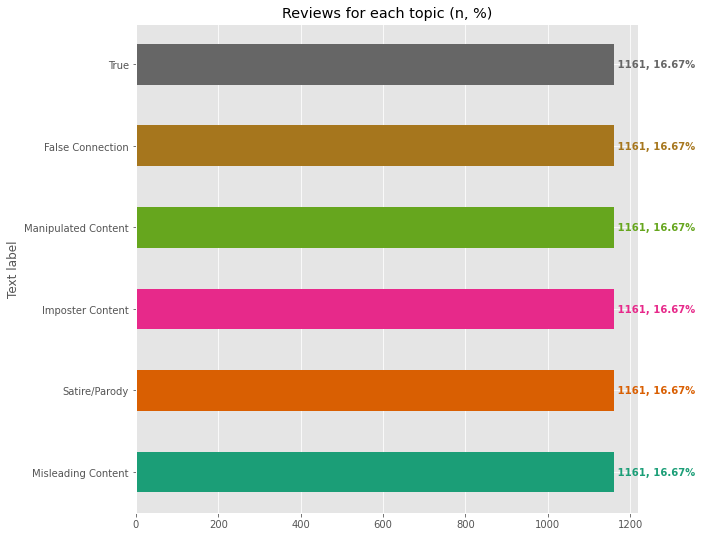

In [9]:
plt.style.use('ggplot')


num_classes = len(train_balanced["Text label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

train_balanced['Text label'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Text label",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(train_balanced['Text label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/train_balanced.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [10]:
test_all = pd.read_csv('./multimodal_test_public.tsv', sep='\t')
validate_all = pd.read_csv('./multimodal_validate.tsv', sep='\t')

test_all.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,trustbytrust,stargazer,1.425139e+09,NaN,True,cozywbv,http://i.imgur.com/BruWKDi.jpg,2xct9d,NaN,3.0,psbattle_artwork,stargazer,NaN,0.0,2.0,4.0
1,NaN,yeah,1.438173e+09,NaN,True,ctk61yw,http://i.imgur.com/JRZT727.jpg,3f0h7o,NaN,2.0,psbattle_artwork,yeah,NaN,0.0,2.0,4.0
2,chaseoes,pd phoenix car thief gets instructions from yo...,1.560492e+09,abc15.com,True,c0gl7r,https://external-preview.redd.it/1A2_4VwgS8Qd2...,NaN,2.0,16.0,nottheonion,PD: Phoenix car thief gets instructions from Y...,0.89,1.0,0.0,0.0
3,SFepicure,as trump accuses iran he has one problem his o...,1.560606e+09,nytimes.com,True,c0xdqy,https://external-preview.redd.it/9BKRcgvaobpTo...,NaN,4.0,45.0,neutralnews,"As Trump Accuses Iran, He Has One Problem: His...",0.78,1.0,0.0,0.0
4,fragments_from_Work,believers hezbollah,1.515139e+09,i.imgur.com,True,7o9rmx,https://external-preview.redd.it/rbwXHncnjVh51...,NaN,40.0,285.0,propagandaposters,"""Believers"" - Hezbollah 2011",0.95,0.0,1.0,5.0


In [11]:
test_all['Text label'] = test_all['6_way_label'].map({
                                            0:'True',
                                            1:'Satire/Parody',
                                            2:'Misleading Content',
                                            3:'Imposter Content',
                                            4:'False Connection',
                                            5:'Manipulated Content',
                                        })   

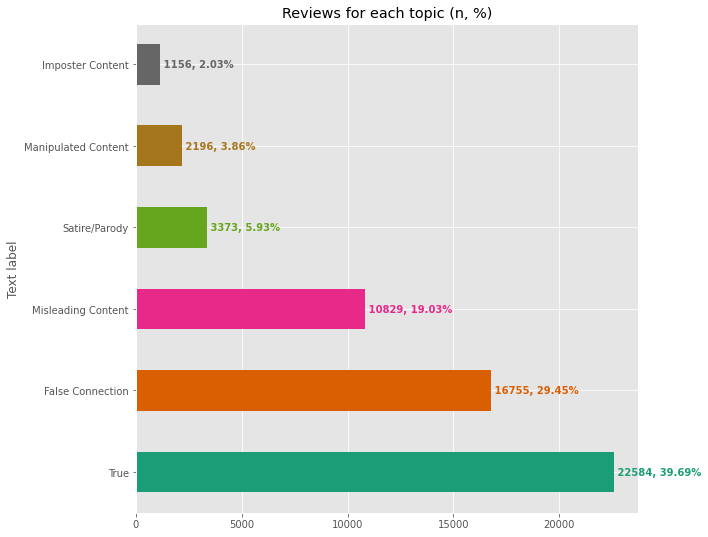

In [12]:
plt.style.use('ggplot')


num_classes = len(test_all["Text label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

test_all['Text label'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Text label",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(test_all['Text label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/test_all.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

There is no need to balance the test data.

In [13]:
!pip install transformers
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer", num_train_epochs=3)

     |████████████████████████████████| 3.8 MB 4.4 MB/s 
     |████████████████████████████████| 67 kB 3.5 MB/s 
     |████████████████████████████████| 6.5 MB 47.8 MB/s 
     |████████████████████████████████| 895 kB 18.3 MB/s 
     |████████████████████████████████| 596 kB 41.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Necesitamos convertirlos a datasets con los que puede trabajar el trainer ya que los dataframes de panda no funcionan

In [14]:
!pip install datasets
from datasets import Dataset

train = train_balanced[["clean_title","6_way_label"]]
eval = validate_all[["clean_title","6_way_label"]]

final_train = Dataset.from_pandas(train)
final_eval = Dataset.from_pandas(eval)

     |████████████████████████████████| 325 kB 5.1 MB/s 
     |████████████████████████████████| 134 kB 39.2 MB/s 
     |████████████████████████████████| 1.1 MB 51.0 MB/s 
     |████████████████████████████████| 212 kB 44.6 MB/s 
     |████████████████████████████████| 127 kB 43.3 MB/s 
     |████████████████████████████████| 144 kB 34.5 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 271 kB 31.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [15]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [16]:
def tokenize_data(example):
    return tokenizer(example['clean_title'], padding='max_length')

In [17]:
final_train = final_train.map(tokenize_data, batched=True)
final_eval = final_eval.map(tokenize_data, batched=True)


  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/60 [00:00<?, ?ba/s]

In [18]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=6)

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [19]:
!rmdir --ignore-fail-on-non-empty ./.git
!ls -a


rmdir: failed to remove './.git': No such file or directory
.   .config			multimodal_train.tsv	 sample_data
..  multimodal_test_public.tsv	multimodal_validate.tsv


In [20]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=final_train, eval_dataset=final_eval
)

In [21]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 6966
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2613


TypeError: ignored